Decision Tree
 
Assignment


About the data: 


Let’s consider a Company dataset with around 10 variables and 400 records. 

The attributes are as follows: 

 Sales -- Unit sales (in thousands) at each location

 Competitor Price -- Price charged by competitor at each location

 Income -- Community income level (in thousands of dollars)

 Advertising -- Local advertising budget for company at each location (in thousands of dollars)

 Population -- Population size in region (in thousands)

 Price -- Price company charges for car seats at each site

 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

 Age -- Average age of the local population

 Education -- Education level at each location

 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location

 US -- A factor with levels No and Yes to indicate whether the store is in the US or not

The company dataset looks like this: 
 
## Problem Statement:

A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 

Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder#for encoding
from sklearn.model_selection import train_test_split#for train test splitting
from sklearn.tree import DecisionTreeClassifier#for decision tree object
from sklearn.metrics import classification_report, confusion_matrix#for checking testing results
from sklearn.tree import plot_tree
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
data= pd.read_csv("Company_Data.csv")

In [ ]:
data.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
data.describe().T

count        mean         std   min     25%     50%     75%  \
Sales        400.0    7.496325    2.824115   0.0    5.39    7.49    9.32   
CompPrice    400.0  124.975000   15.334512  77.0  115.00  125.00  135.00   
Income       400.0   68.657500   27.986037  21.0   42.75   69.00   91.00   
Advertising  400.0    6.635000    6.650364   0.0    0.00    5.00   12.00   
Population   400.0  264.840000  147.376436  10.0  139.00  272.00  398.50   
Price        400.0  115.795000   23.676664  24.0  100.00  117.00  131.00   
Age          400.0   53.322500   16.200297  25.0   39.75   54.50   66.00   
Education    400.0   13.900000    2.620528  10.0   12.00   14.00   16.00   

                max  
Sales         16.27  
CompPrice    175.00  
Income       120.00  
Advertising   29.00  
Population   509.00  
Price        191.00  
Age           80.00  
Education     18.00

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [ ]:
data.shape

(400, 11)

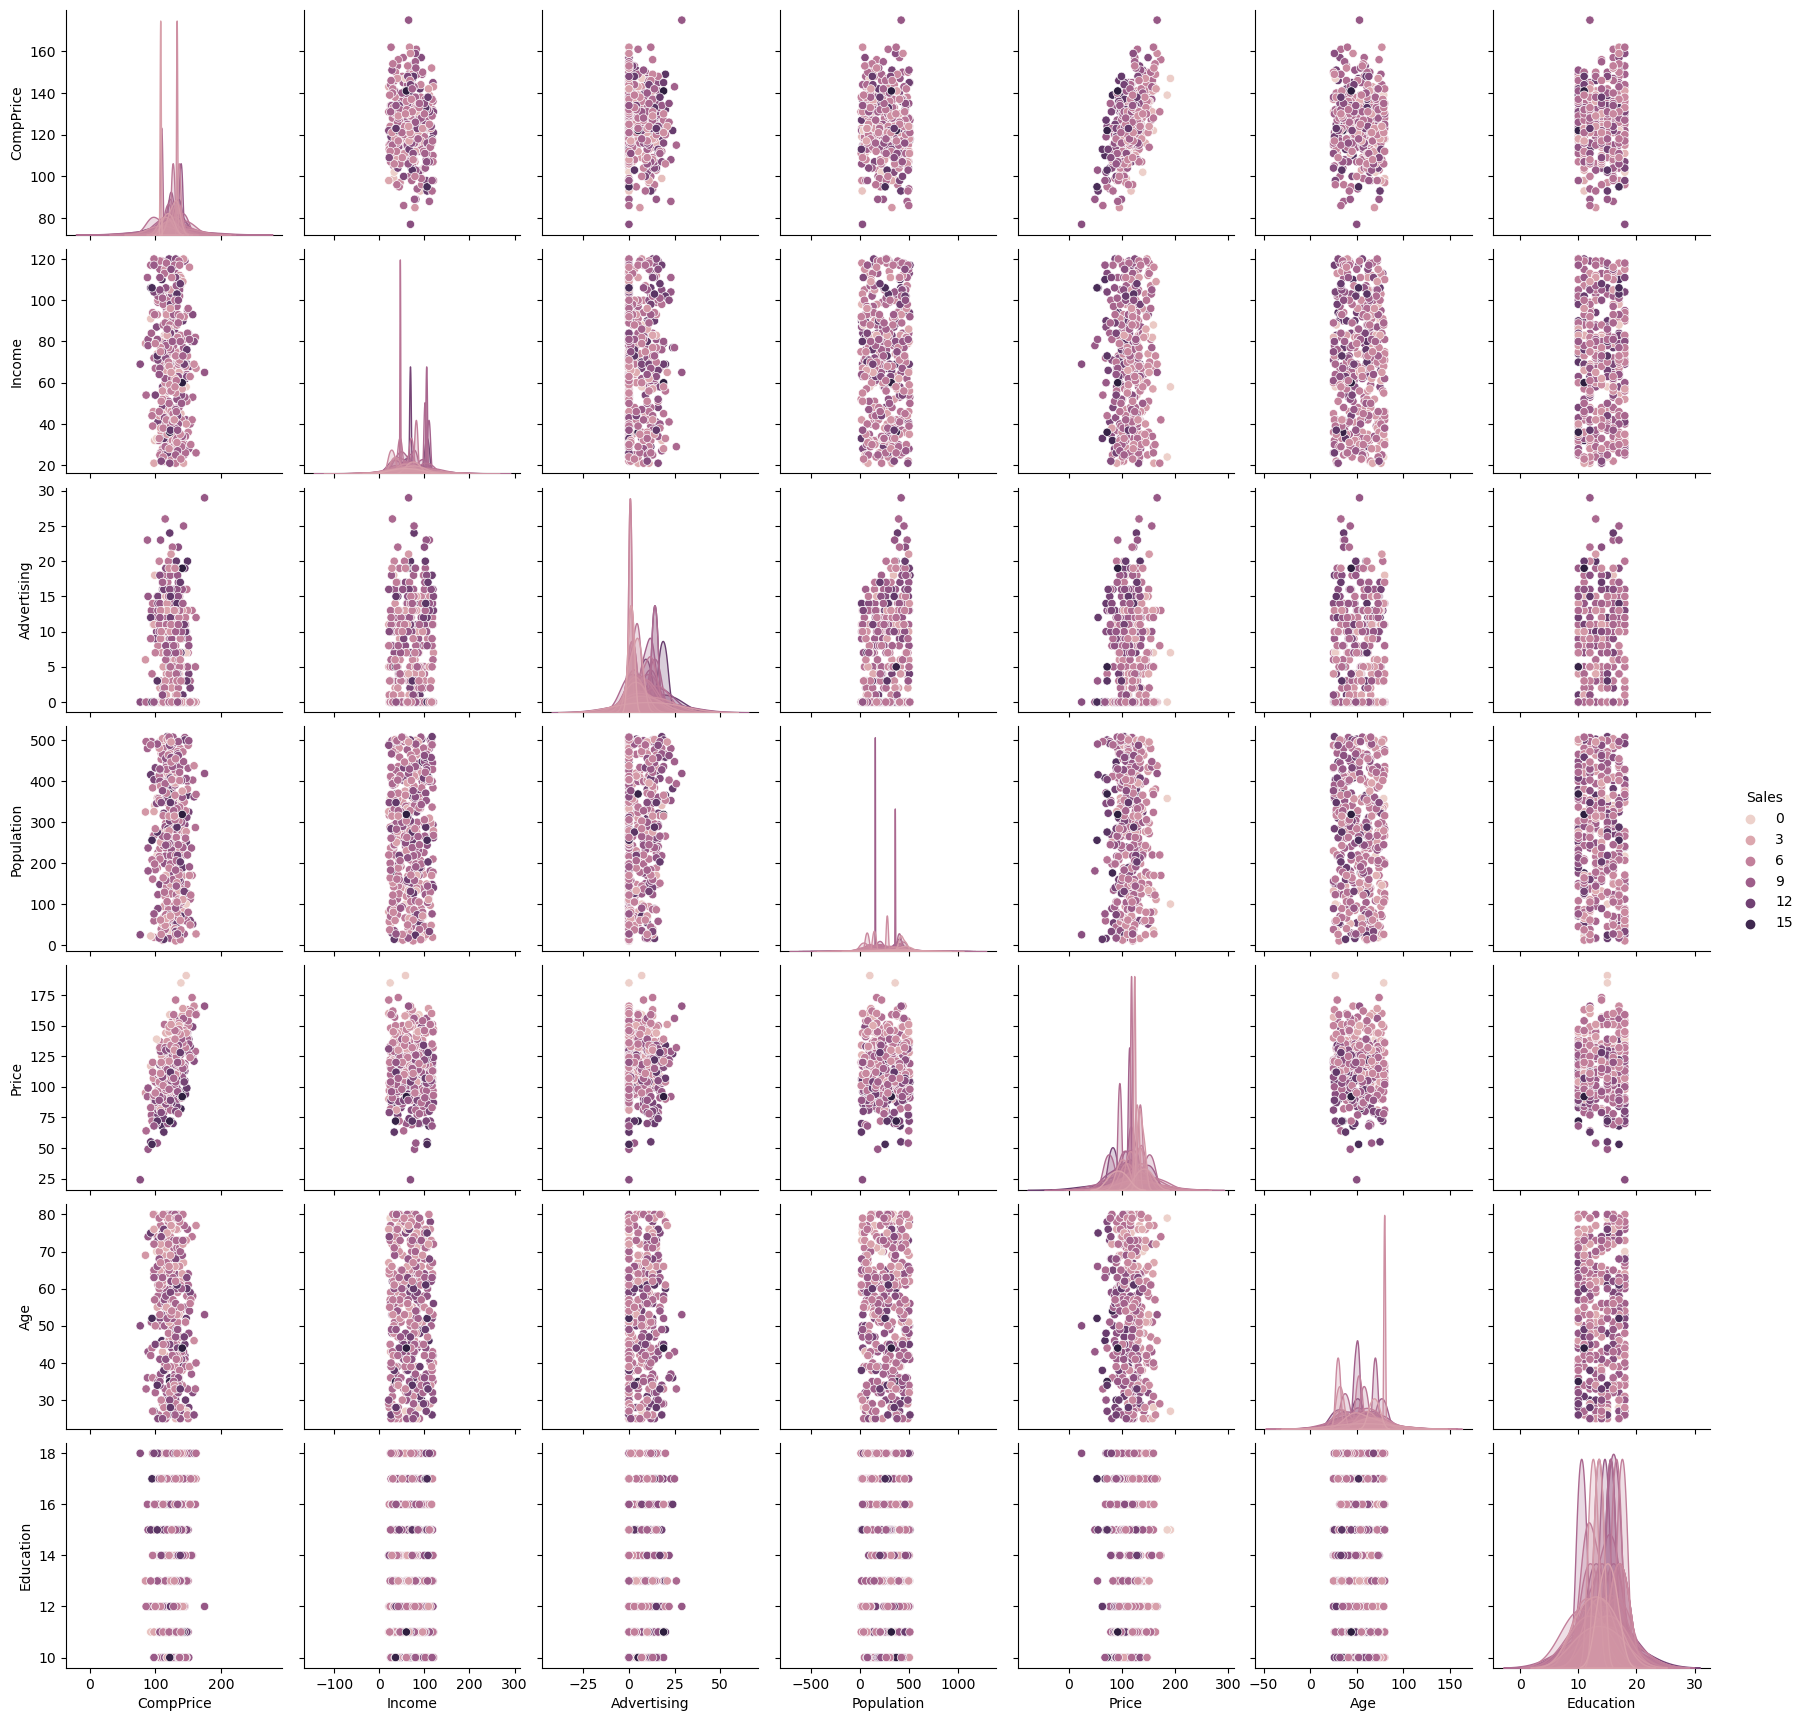

In [ ]:
# Data Visualize
sns.pairplot(data=data, hue = 'Sales')

In [ ]:
data.corr()

Sales  CompPrice    Income  Advertising  Population     Price  \
Sales        1.000000   0.064079  0.151951     0.269507    0.050471 -0.444951   
CompPrice    0.064079   1.000000 -0.080653    -0.024199   -0.094707  0.584848   
Income       0.151951  -0.080653  1.000000     0.058995   -0.007877 -0.056698   
Advertising  0.269507  -0.024199  0.058995     1.000000    0.265652  0.044537   
Population   0.050471  -0.094707 -0.007877     0.265652    1.000000 -0.012144   
Price       -0.444951   0.584848 -0.056698     0.044537   -0.012144  1.000000   
Age         -0.231815  -0.100239 -0.004670    -0.004557   -0.042663 -0.102177   
Education   -0.051955   0.025197 -0.056855    -0.033594   -0.106378  0.011747   

                  Age  Education  
Sales       -0.231815  -0.051955  
CompPrice   -0.100239   0.025197  
Income      -0.004670  -0.056855  
Advertising -0.004557  -0.033594  
Population  -0.042663  -0.106378  
Price       -0.102177   0.011747  
Age          1.000000   0.006488  
Education    0.006488   1.000000

<AxesSubplot:>

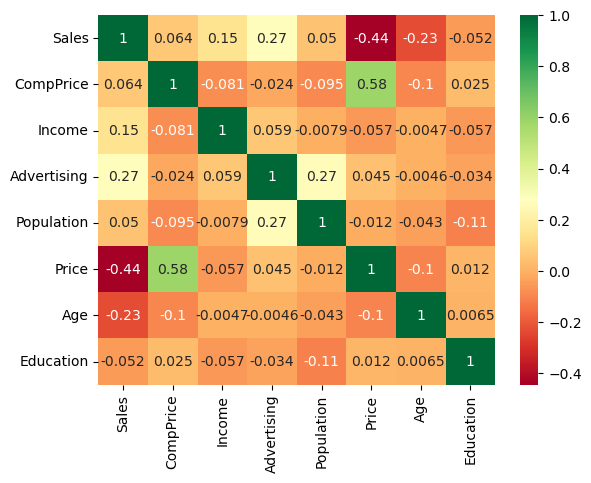

In [ ]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')

In [ ]:
#Creating dummy vairables dropping first dummy variable
data =pd.get_dummies(data,columns=['Urban','US'] ,drop_first=True)

In [ ]:
data.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education  Urban_Yes  US_Yes  
0         17          1       1  
1         10          1       1  
2         12          1       1  
3         14          1       1  
4         13          1       0

In [ ]:
from sklearn. preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
le.fit_transform(data['ShelveLoc'])

array([0, 1, 2, 2, 0, 0, 2, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1,
       2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 0, 0, 2, 2,
       2, 0, 2, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 1, 2, 0, 2, 2, 2, 0, 0, 1, 1, 0, 0, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 0, 2, 1, 0, 1, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2,
       2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 2, 1, 2, 0, 0, 2, 2,
       1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2,
       2, 2, 1, 2, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 0, 0, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 0, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 0, 2, 2,
       2, 2, 2, 1, 0, 0, 2, 0, 1, 0, 2, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2,
       1, 0, 1, 0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 0, 1, 1, 2, 0, 2,
       2, 0, 2, 2, 2, 0, 1, 1, 1, 2, 1, 0, 1, 2, 2,

In [ ]:
data_new= data.copy()

In [ ]:
data_new['ShelveLoc'] = le.fit_transform(data['ShelveLoc'])
data_new.head()

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0   9.50        138      73           11         276    120          0   42   
1  11.22        111      48           16         260     83          1   65   
2  10.06        113      35           10         269     80          2   59   
3   7.40        117     100            4         466     97          2   55   
4   4.15        141      64            3         340    128          0   38   

   Education  Urban_Yes  US_Yes  
0         17          1       1  
1         10          1       1  
2         12          1       1  
3         14          1       1  
4         13          1       0

In [ ]:
data_final= data_new.copy()
data_final.head()

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0   9.50        138      73           11         276    120          0   42   
1  11.22        111      48           16         260     83          1   65   
2  10.06        113      35           10         269     80          2   59   
3   7.40        117     100            4         466     97          2   55   
4   4.15        141      64            3         340    128          0   38   

   Education  Urban_Yes  US_Yes  
0         17          1       1  
1         10          1       1  
2         12          1       1  
3         14          1       1  
4         13          1       0

In [ ]:
data_final.drop(data_final.iloc[:,7:10], axis = 1, inplace=True)

In [ ]:
data_final.head()

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  US_Yes
0   9.50        138      73           11         276    120          0       1
1  11.22        111      48           16         260     83          1       1
2  10.06        113      35           10         269     80          2       1
3   7.40        117     100            4         466     97          2       1
4   4.15        141      64            3         340    128          0       0

<AxesSubplot:>

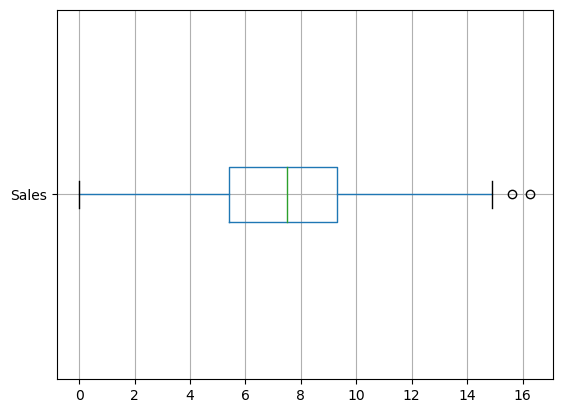

In [ ]:
data_final.boxplot("Sales",vert=False)

<AxesSubplot:>

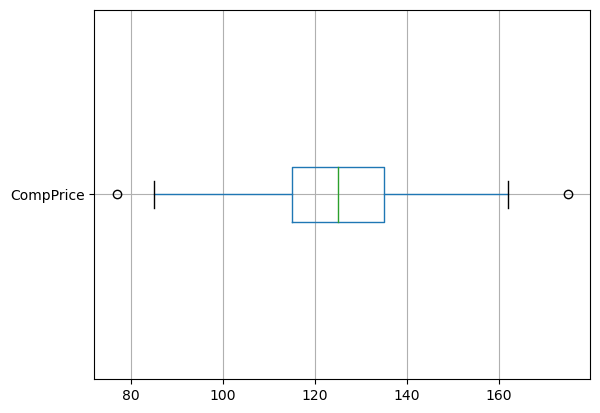

In [ ]:
data_final.boxplot("CompPrice",vert=False)

<AxesSubplot:>

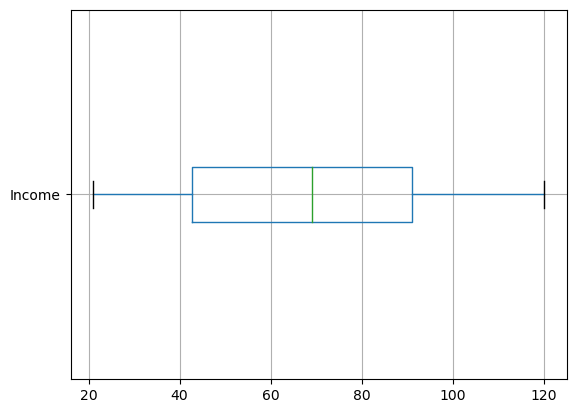

In [ ]:
data_final.boxplot("Income",vert=False)

<AxesSubplot:>

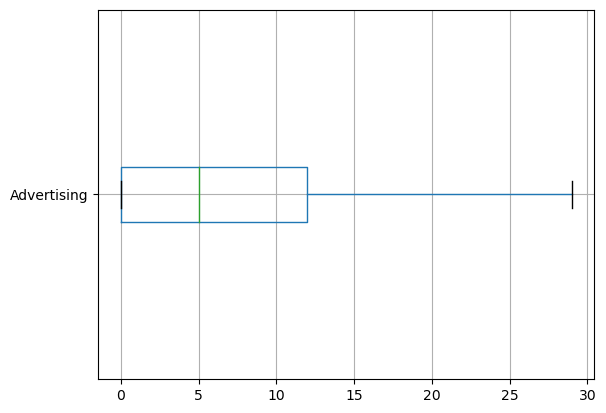

In [ ]:
data_final.boxplot("Advertising",vert=False)

<AxesSubplot:>

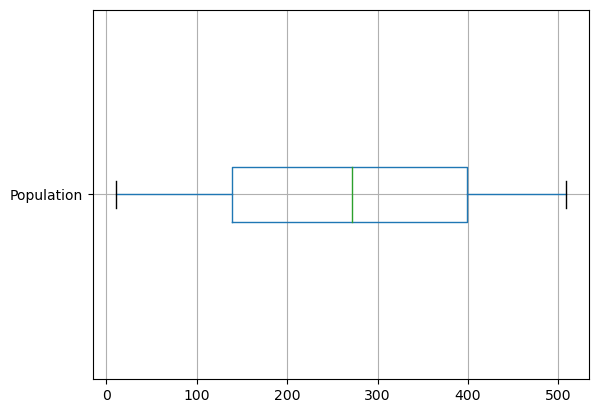

In [ ]:
data_final.boxplot("Population",vert=False)

### Few values are outliners in sales and CompPrice

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
model_forest = IsolationForest(contamination=0.01)
model_forest.fit(data_final)

IsolationForest(contamination=0.01)

In [ ]:
data_final['Anomaly']= model_forest.predict(data_final)

In [ ]:
data_final[data_final['Anomaly'] == -1]

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  \
42   10.43         77      69            0          25     24          2   
57    0.91         93      91            0          22    117          0   
310   9.53        175      65           29         419    166          2   
367  14.37         95     106            0         256     53          1   

     US_Yes  Anomaly  
42        0       -1  
57        0       -1  
310       1       -1  
367       0       -1

In [ ]:
data_impro =data_final.drop(data_final.index[[42,57,310,367]],axis=0).reset_index(drop=True)
data_impro

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  \
0     9.50        138      73           11         276    120          0   
1    11.22        111      48           16         260     83          1   
2    10.06        113      35           10         269     80          2   
3     7.40        117     100            4         466     97          2   
4     4.15        141      64            3         340    128          0   
..     ...        ...     ...          ...         ...    ...        ...   
391  12.57        138     108           17         203    128          1   
392   6.14        139      23            3          37    120          2   
393   7.41        162      26           12         368    159          2   
394   5.94        100      79            7         284     95          0   
395   9.71        134      37            0          27    120          1   

     US_Yes  Anomaly  
0         1        1  
1         1        1  
2         1        1  
3         1        1  
4         0        1  
..      ...      ...  
391       1        1  
392       1        1  
393       1        1  
394       1        1  
395       1        1  

[396 rows x 9 columns]

## Split into X and Y

In [ ]:
X = data_impro.iloc[:,1:8]
y = data_impro.iloc[:,0]

In [ ]:
X.head()

CompPrice  Income  Advertising  Population  Price  ShelveLoc  US_Yes
0        138      73           11         276    120          0       1
1        111      48           16         260     83          1       1
2        113      35           10         269     80          2       1
3        117     100            4         466     97          2       1
4        141      64            3         340    128          0       0

In [ ]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
# Create the model
model = DecisionTreeRegressor()

# Define the grid search parameters
tuned_paramerters= [{'criterion':['squared_error','absolute_error',"poisson",'friedman_mse'],
                     'splitter': ['best', 'random'],
                     'min_samples_split':range(2,10),
                     'max_depth': range(2,10)}]


param_grid = tuned_paramerters

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)

In [ ]:
grid_result= grid.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits
[CV 1/5; 1/512] START criterion=squared_error, max_depth=2, min_samples_split=2, splitter=best
[CV 1/5; 1/512] END criterion=squared_error, max_depth=2, min_samples_split=2, splitter=best;, score=0.092 total time=   0.0s
[CV 2/5; 1/512] START criterion=squared_error, max_depth=2, min_samples_split=2, splitter=best
[CV 2/5; 1/512] END criterion=squared_error, max_depth=2, min_samples_split=2, splitter=best;, score=0.296 total time=   0.0s
[CV 3/5; 1/512] START criterion=squared_error, max_depth=2, min_samples_split=2, splitter=best
[CV 3/5; 1/512] END criterion=squared_error, max_depth=2, min_samples_split=2, splitter=best;, score=0.140 total time=   0.0s
[CV 4/5; 1/512] START criterion=squared_error, max_depth=2, min_samples_split=2, splitter=best
[CV 4/5; 1/512] END criterion=squared_error, max_depth=2, min_samples_split=2, splitter=best;, score=0.143 total time=   0.0s
[CV 5/5; 1/512] START criterion=squared_error, max_d

[CV 1/5; 9/512] END criterion=squared_error, max_depth=2, min_samples_split=6, splitter=best;, score=0.092 total time=   0.0s
[CV 2/5; 9/512] START criterion=squared_error, max_depth=2, min_samples_split=6, splitter=best
[CV 2/5; 9/512] END criterion=squared_error, max_depth=2, min_samples_split=6, splitter=best;, score=0.296 total time=   0.0s
[CV 3/5; 9/512] START criterion=squared_error, max_depth=2, min_samples_split=6, splitter=best
[CV 3/5; 9/512] END criterion=squared_error, max_depth=2, min_samples_split=6, splitter=best;, score=0.140 total time=   0.0s
[CV 4/5; 9/512] START criterion=squared_error, max_depth=2, min_samples_split=6, splitter=best
[CV 4/5; 9/512] END criterion=squared_error, max_depth=2, min_samples_split=6, splitter=best;, score=0.143 total time=   0.0s
[CV 5/5; 9/512] START criterion=squared_error, max_depth=2, min_samples_split=6, splitter=best
[CV 5/5; 9/512] END criterion=squared_error, max_depth=2, min_samples_split=6, splitter=best;, score=0.130 total tim

[CV 5/5; 17/512] END criterion=squared_error, max_depth=3, min_samples_split=2, splitter=best;, score=0.452 total time=   0.0s
[CV 1/5; 18/512] START criterion=squared_error, max_depth=3, min_samples_split=2, splitter=random
[CV 1/5; 18/512] END criterion=squared_error, max_depth=3, min_samples_split=2, splitter=random;, score=0.113 total time=   0.0s
[CV 2/5; 18/512] START criterion=squared_error, max_depth=3, min_samples_split=2, splitter=random
[CV 2/5; 18/512] END criterion=squared_error, max_depth=3, min_samples_split=2, splitter=random;, score=0.503 total time=   0.0s
[CV 3/5; 18/512] START criterion=squared_error, max_depth=3, min_samples_split=2, splitter=random
[CV 3/5; 18/512] END criterion=squared_error, max_depth=3, min_samples_split=2, splitter=random;, score=0.067 total time=   0.0s
[CV 4/5; 18/512] START criterion=squared_error, max_depth=3, min_samples_split=2, splitter=random
[CV 4/5; 18/512] END criterion=squared_error, max_depth=3, min_samples_split=2, splitter=rando

[CV 3/5; 26/512] END criterion=squared_error, max_depth=3, min_samples_split=6, splitter=random;, score=0.061 total time=   0.0s
[CV 4/5; 26/512] START criterion=squared_error, max_depth=3, min_samples_split=6, splitter=random
[CV 4/5; 26/512] END criterion=squared_error, max_depth=3, min_samples_split=6, splitter=random;, score=0.326 total time=   0.0s
[CV 5/5; 26/512] START criterion=squared_error, max_depth=3, min_samples_split=6, splitter=random
[CV 5/5; 26/512] END criterion=squared_error, max_depth=3, min_samples_split=6, splitter=random;, score=0.414 total time=   0.0s
[CV 1/5; 27/512] START criterion=squared_error, max_depth=3, min_samples_split=7, splitter=best
[CV 1/5; 27/512] END criterion=squared_error, max_depth=3, min_samples_split=7, splitter=best;, score=0.131 total time=   0.0s
[CV 2/5; 27/512] START criterion=squared_error, max_depth=3, min_samples_split=7, splitter=best
[CV 2/5; 27/512] END criterion=squared_error, max_depth=3, min_samples_split=7, splitter=best;, sc

[CV 4/5; 34/512] END criterion=squared_error, max_depth=4, min_samples_split=2, splitter=random;, score=0.063 total time=   0.0s
[CV 5/5; 34/512] START criterion=squared_error, max_depth=4, min_samples_split=2, splitter=random
[CV 5/5; 34/512] END criterion=squared_error, max_depth=4, min_samples_split=2, splitter=random;, score=0.310 total time=   0.0s
[CV 1/5; 35/512] START criterion=squared_error, max_depth=4, min_samples_split=3, splitter=best
[CV 1/5; 35/512] END criterion=squared_error, max_depth=4, min_samples_split=3, splitter=best;, score=-0.001 total time=   0.0s
[CV 2/5; 35/512] START criterion=squared_error, max_depth=4, min_samples_split=3, splitter=best
[CV 2/5; 35/512] END criterion=squared_error, max_depth=4, min_samples_split=3, splitter=best;, score=0.366 total time=   0.0s
[CV 3/5; 35/512] START criterion=squared_error, max_depth=4, min_samples_split=3, splitter=best
[CV 3/5; 35/512] END criterion=squared_error, max_depth=4, min_samples_split=3, splitter=best;, score

[CV 4/5; 43/512] END criterion=squared_error, max_depth=4, min_samples_split=7, splitter=best;, score=0.420 total time=   0.0s
[CV 5/5; 43/512] START criterion=squared_error, max_depth=4, min_samples_split=7, splitter=best
[CV 5/5; 43/512] END criterion=squared_error, max_depth=4, min_samples_split=7, splitter=best;, score=0.476 total time=   0.0s
[CV 1/5; 44/512] START criterion=squared_error, max_depth=4, min_samples_split=7, splitter=random
[CV 1/5; 44/512] END criterion=squared_error, max_depth=4, min_samples_split=7, splitter=random;, score=0.088 total time=   0.0s
[CV 2/5; 44/512] START criterion=squared_error, max_depth=4, min_samples_split=7, splitter=random
[CV 2/5; 44/512] END criterion=squared_error, max_depth=4, min_samples_split=7, splitter=random;, score=0.128 total time=   0.0s
[CV 3/5; 44/512] START criterion=squared_error, max_depth=4, min_samples_split=7, splitter=random
[CV 3/5; 44/512] END criterion=squared_error, max_depth=4, min_samples_split=7, splitter=random;, 

[CV 2/5; 52/512] END criterion=squared_error, max_depth=5, min_samples_split=3, splitter=random;, score=0.327 total time=   0.0s
[CV 3/5; 52/512] START criterion=squared_error, max_depth=5, min_samples_split=3, splitter=random
[CV 3/5; 52/512] END criterion=squared_error, max_depth=5, min_samples_split=3, splitter=random;, score=0.049 total time=   0.0s
[CV 4/5; 52/512] START criterion=squared_error, max_depth=5, min_samples_split=3, splitter=random
[CV 4/5; 52/512] END criterion=squared_error, max_depth=5, min_samples_split=3, splitter=random;, score=0.356 total time=   0.0s
[CV 5/5; 52/512] START criterion=squared_error, max_depth=5, min_samples_split=3, splitter=random
[CV 5/5; 52/512] END criterion=squared_error, max_depth=5, min_samples_split=3, splitter=random;, score=0.445 total time=   0.0s
[CV 1/5; 53/512] START criterion=squared_error, max_depth=5, min_samples_split=4, splitter=best
[CV 1/5; 53/512] END criterion=squared_error, max_depth=5, min_samples_split=4, splitter=best;

[CV 3/5; 61/512] END criterion=squared_error, max_depth=5, min_samples_split=8, splitter=best;, score=0.109 total time=   0.0s
[CV 4/5; 61/512] START criterion=squared_error, max_depth=5, min_samples_split=8, splitter=best
[CV 4/5; 61/512] END criterion=squared_error, max_depth=5, min_samples_split=8, splitter=best;, score=0.363 total time=   0.0s
[CV 5/5; 61/512] START criterion=squared_error, max_depth=5, min_samples_split=8, splitter=best
[CV 5/5; 61/512] END criterion=squared_error, max_depth=5, min_samples_split=8, splitter=best;, score=0.484 total time=   0.0s
[CV 1/5; 62/512] START criterion=squared_error, max_depth=5, min_samples_split=8, splitter=random
[CV 1/5; 62/512] END criterion=squared_error, max_depth=5, min_samples_split=8, splitter=random;, score=0.343 total time=   0.0s
[CV 2/5; 62/512] START criterion=squared_error, max_depth=5, min_samples_split=8, splitter=random
[CV 2/5; 62/512] END criterion=squared_error, max_depth=5, min_samples_split=8, splitter=random;, scor

[CV 5/5; 69/512] END criterion=squared_error, max_depth=6, min_samples_split=4, splitter=best;, score=0.433 total time=   0.0s
[CV 1/5; 70/512] START criterion=squared_error, max_depth=6, min_samples_split=4, splitter=random
[CV 1/5; 70/512] END criterion=squared_error, max_depth=6, min_samples_split=4, splitter=random;, score=0.133 total time=   0.0s
[CV 2/5; 70/512] START criterion=squared_error, max_depth=6, min_samples_split=4, splitter=random
[CV 2/5; 70/512] END criterion=squared_error, max_depth=6, min_samples_split=4, splitter=random;, score=0.507 total time=   0.0s
[CV 3/5; 70/512] START criterion=squared_error, max_depth=6, min_samples_split=4, splitter=random
[CV 3/5; 70/512] END criterion=squared_error, max_depth=6, min_samples_split=4, splitter=random;, score=0.059 total time=   0.0s
[CV 4/5; 70/512] START criterion=squared_error, max_depth=6, min_samples_split=4, splitter=random
[CV 4/5; 70/512] END criterion=squared_error, max_depth=6, min_samples_split=4, splitter=rando

[CV 3/5; 84/512] END criterion=squared_error, max_depth=7, min_samples_split=3, splitter=random;, score=0.212 total time=   0.0s
[CV 4/5; 84/512] START criterion=squared_error, max_depth=7, min_samples_split=3, splitter=random
[CV 4/5; 84/512] END criterion=squared_error, max_depth=7, min_samples_split=3, splitter=random;, score=0.158 total time=   0.0s
[CV 5/5; 84/512] START criterion=squared_error, max_depth=7, min_samples_split=3, splitter=random
[CV 5/5; 84/512] END criterion=squared_error, max_depth=7, min_samples_split=3, splitter=random;, score=0.432 total time=   0.0s
[CV 1/5; 85/512] START criterion=squared_error, max_depth=7, min_samples_split=4, splitter=best
[CV 1/5; 85/512] END criterion=squared_error, max_depth=7, min_samples_split=4, splitter=best;, score=0.035 total time=   0.0s
[CV 2/5; 85/512] START criterion=squared_error, max_depth=7, min_samples_split=4, splitter=best
[CV 2/5; 85/512] END criterion=squared_error, max_depth=7, min_samples_split=4, splitter=best;, sc

[CV 3/5; 92/512] END criterion=squared_error, max_depth=7, min_samples_split=7, splitter=random;, score=0.287 total time=   0.0s
[CV 4/5; 92/512] START criterion=squared_error, max_depth=7, min_samples_split=7, splitter=random
[CV 4/5; 92/512] END criterion=squared_error, max_depth=7, min_samples_split=7, splitter=random;, score=0.548 total time=   0.0s
[CV 5/5; 92/512] START criterion=squared_error, max_depth=7, min_samples_split=7, splitter=random
[CV 5/5; 92/512] END criterion=squared_error, max_depth=7, min_samples_split=7, splitter=random;, score=0.384 total time=   0.0s
[CV 1/5; 93/512] START criterion=squared_error, max_depth=7, min_samples_split=8, splitter=best
[CV 1/5; 93/512] END criterion=squared_error, max_depth=7, min_samples_split=8, splitter=best;, score=0.036 total time=   0.0s
[CV 2/5; 93/512] START criterion=squared_error, max_depth=7, min_samples_split=8, splitter=best
[CV 2/5; 93/512] END criterion=squared_error, max_depth=7, min_samples_split=8, splitter=best;, sc

[CV 3/5; 100/512] END criterion=squared_error, max_depth=8, min_samples_split=3, splitter=random;, score=-0.044 total time=   0.0s
[CV 4/5; 100/512] START criterion=squared_error, max_depth=8, min_samples_split=3, splitter=random
[CV 4/5; 100/512] END criterion=squared_error, max_depth=8, min_samples_split=3, splitter=random;, score=0.352 total time=   0.0s
[CV 5/5; 100/512] START criterion=squared_error, max_depth=8, min_samples_split=3, splitter=random
[CV 5/5; 100/512] END criterion=squared_error, max_depth=8, min_samples_split=3, splitter=random;, score=0.300 total time=   0.0s
[CV 1/5; 101/512] START criterion=squared_error, max_depth=8, min_samples_split=4, splitter=best
[CV 1/5; 101/512] END criterion=squared_error, max_depth=8, min_samples_split=4, splitter=best;, score=-0.023 total time=   0.0s
[CV 2/5; 101/512] START criterion=squared_error, max_depth=8, min_samples_split=4, splitter=best
[CV 2/5; 101/512] END criterion=squared_error, max_depth=8, min_samples_split=4, splitte

[CV 4/5; 109/512] END criterion=squared_error, max_depth=8, min_samples_split=8, splitter=best;, score=0.196 total time=   0.0s
[CV 5/5; 109/512] START criterion=squared_error, max_depth=8, min_samples_split=8, splitter=best
[CV 5/5; 109/512] END criterion=squared_error, max_depth=8, min_samples_split=8, splitter=best;, score=0.419 total time=   0.0s
[CV 1/5; 110/512] START criterion=squared_error, max_depth=8, min_samples_split=8, splitter=random
[CV 1/5; 110/512] END criterion=squared_error, max_depth=8, min_samples_split=8, splitter=random;, score=0.040 total time=   0.0s
[CV 2/5; 110/512] START criterion=squared_error, max_depth=8, min_samples_split=8, splitter=random
[CV 2/5; 110/512] END criterion=squared_error, max_depth=8, min_samples_split=8, splitter=random;, score=0.161 total time=   0.0s
[CV 3/5; 110/512] START criterion=squared_error, max_depth=8, min_samples_split=8, splitter=random
[CV 3/5; 110/512] END criterion=squared_error, max_depth=8, min_samples_split=8, splitter=

[CV 1/5; 118/512] END criterion=squared_error, max_depth=9, min_samples_split=4, splitter=random;, score=0.122 total time=   0.0s
[CV 2/5; 118/512] START criterion=squared_error, max_depth=9, min_samples_split=4, splitter=random
[CV 2/5; 118/512] END criterion=squared_error, max_depth=9, min_samples_split=4, splitter=random;, score=0.314 total time=   0.0s
[CV 3/5; 118/512] START criterion=squared_error, max_depth=9, min_samples_split=4, splitter=random
[CV 3/5; 118/512] END criterion=squared_error, max_depth=9, min_samples_split=4, splitter=random;, score=0.191 total time=   0.0s
[CV 4/5; 118/512] START criterion=squared_error, max_depth=9, min_samples_split=4, splitter=random
[CV 4/5; 118/512] END criterion=squared_error, max_depth=9, min_samples_split=4, splitter=random;, score=0.234 total time=   0.0s
[CV 5/5; 118/512] START criterion=squared_error, max_depth=9, min_samples_split=4, splitter=random
[CV 5/5; 118/512] END criterion=squared_error, max_depth=9, min_samples_split=4, spl

[CV 1/5; 132/512] END criterion=absolute_error, max_depth=2, min_samples_split=3, splitter=random;, score=-0.068 total time=   0.0s
[CV 2/5; 132/512] START criterion=absolute_error, max_depth=2, min_samples_split=3, splitter=random
[CV 2/5; 132/512] END criterion=absolute_error, max_depth=2, min_samples_split=3, splitter=random;, score=0.290 total time=   0.0s
[CV 3/5; 132/512] START criterion=absolute_error, max_depth=2, min_samples_split=3, splitter=random
[CV 3/5; 132/512] END criterion=absolute_error, max_depth=2, min_samples_split=3, splitter=random;, score=0.126 total time=   0.0s
[CV 4/5; 132/512] START criterion=absolute_error, max_depth=2, min_samples_split=3, splitter=random
[CV 4/5; 132/512] END criterion=absolute_error, max_depth=2, min_samples_split=3, splitter=random;, score=0.056 total time=   0.0s
[CV 5/5; 132/512] START criterion=absolute_error, max_depth=2, min_samples_split=3, splitter=random
[CV 5/5; 132/512] END criterion=absolute_error, max_depth=2, min_samples_sp

[CV 5/5; 139/512] END criterion=absolute_error, max_depth=2, min_samples_split=7, splitter=best;, score=0.164 total time=   0.0s
[CV 1/5; 140/512] START criterion=absolute_error, max_depth=2, min_samples_split=7, splitter=random
[CV 1/5; 140/512] END criterion=absolute_error, max_depth=2, min_samples_split=7, splitter=random;, score=0.033 total time=   0.0s
[CV 2/5; 140/512] START criterion=absolute_error, max_depth=2, min_samples_split=7, splitter=random
[CV 2/5; 140/512] END criterion=absolute_error, max_depth=2, min_samples_split=7, splitter=random;, score=0.290 total time=   0.0s
[CV 3/5; 140/512] START criterion=absolute_error, max_depth=2, min_samples_split=7, splitter=random
[CV 3/5; 140/512] END criterion=absolute_error, max_depth=2, min_samples_split=7, splitter=random;, score=0.111 total time=   0.0s
[CV 4/5; 140/512] START criterion=absolute_error, max_depth=2, min_samples_split=7, splitter=random
[CV 4/5; 140/512] END criterion=absolute_error, max_depth=2, min_samples_split

[CV 3/5; 147/512] END criterion=absolute_error, max_depth=3, min_samples_split=3, splitter=best;, score=0.261 total time=   0.0s
[CV 4/5; 147/512] START criterion=absolute_error, max_depth=3, min_samples_split=3, splitter=best
[CV 4/5; 147/512] END criterion=absolute_error, max_depth=3, min_samples_split=3, splitter=best;, score=0.490 total time=   0.0s
[CV 5/5; 147/512] START criterion=absolute_error, max_depth=3, min_samples_split=3, splitter=best
[CV 5/5; 147/512] END criterion=absolute_error, max_depth=3, min_samples_split=3, splitter=best;, score=0.452 total time=   0.0s
[CV 1/5; 148/512] START criterion=absolute_error, max_depth=3, min_samples_split=3, splitter=random
[CV 1/5; 148/512] END criterion=absolute_error, max_depth=3, min_samples_split=3, splitter=random;, score=0.253 total time=   0.0s
[CV 2/5; 148/512] START criterion=absolute_error, max_depth=3, min_samples_split=3, splitter=random
[CV 2/5; 148/512] END criterion=absolute_error, max_depth=3, min_samples_split=3, spli

[CV 3/5; 161/512] END criterion=absolute_error, max_depth=4, min_samples_split=2, splitter=best;, score=0.227 total time=   0.0s
[CV 4/5; 161/512] START criterion=absolute_error, max_depth=4, min_samples_split=2, splitter=best
[CV 4/5; 161/512] END criterion=absolute_error, max_depth=4, min_samples_split=2, splitter=best;, score=0.521 total time=   0.0s
[CV 5/5; 161/512] START criterion=absolute_error, max_depth=4, min_samples_split=2, splitter=best
[CV 5/5; 161/512] END criterion=absolute_error, max_depth=4, min_samples_split=2, splitter=best;, score=0.436 total time=   0.0s
[CV 1/5; 162/512] START criterion=absolute_error, max_depth=4, min_samples_split=2, splitter=random
[CV 1/5; 162/512] END criterion=absolute_error, max_depth=4, min_samples_split=2, splitter=random;, score=0.266 total time=   0.0s
[CV 2/5; 162/512] START criterion=absolute_error, max_depth=4, min_samples_split=2, splitter=random
[CV 2/5; 162/512] END criterion=absolute_error, max_depth=4, min_samples_split=2, spli

[CV 5/5; 173/512] END criterion=absolute_error, max_depth=4, min_samples_split=8, splitter=best;, score=0.436 total time=   0.0s
[CV 1/5; 174/512] START criterion=absolute_error, max_depth=4, min_samples_split=8, splitter=random
[CV 1/5; 174/512] END criterion=absolute_error, max_depth=4, min_samples_split=8, splitter=random;, score=0.123 total time=   0.0s
[CV 2/5; 174/512] START criterion=absolute_error, max_depth=4, min_samples_split=8, splitter=random
[CV 2/5; 174/512] END criterion=absolute_error, max_depth=4, min_samples_split=8, splitter=random;, score=0.272 total time=   0.0s
[CV 3/5; 174/512] START criterion=absolute_error, max_depth=4, min_samples_split=8, splitter=random
[CV 3/5; 174/512] END criterion=absolute_error, max_depth=4, min_samples_split=8, splitter=random;, score=-0.043 total time=   0.0s
[CV 4/5; 174/512] START criterion=absolute_error, max_depth=4, min_samples_split=8, splitter=random
[CV 4/5; 174/512] END criterion=absolute_error, max_depth=4, min_samples_spli

[CV 3/5; 186/512] END criterion=absolute_error, max_depth=5, min_samples_split=6, splitter=random;, score=0.254 total time=   0.0s
[CV 4/5; 186/512] START criterion=absolute_error, max_depth=5, min_samples_split=6, splitter=random
[CV 4/5; 186/512] END criterion=absolute_error, max_depth=5, min_samples_split=6, splitter=random;, score=0.344 total time=   0.0s
[CV 5/5; 186/512] START criterion=absolute_error, max_depth=5, min_samples_split=6, splitter=random
[CV 5/5; 186/512] END criterion=absolute_error, max_depth=5, min_samples_split=6, splitter=random;, score=0.456 total time=   0.0s
[CV 1/5; 187/512] START criterion=absolute_error, max_depth=5, min_samples_split=7, splitter=best
[CV 1/5; 187/512] END criterion=absolute_error, max_depth=5, min_samples_split=7, splitter=best;, score=0.018 total time=   0.0s
[CV 2/5; 187/512] START criterion=absolute_error, max_depth=5, min_samples_split=7, splitter=best
[CV 2/5; 187/512] END criterion=absolute_error, max_depth=5, min_samples_split=7, 

[CV 2/5; 197/512] END criterion=absolute_error, max_depth=6, min_samples_split=4, splitter=best;, score=0.307 total time=   0.0s
[CV 3/5; 197/512] START criterion=absolute_error, max_depth=6, min_samples_split=4, splitter=best
[CV 3/5; 197/512] END criterion=absolute_error, max_depth=6, min_samples_split=4, splitter=best;, score=0.284 total time=   0.0s
[CV 4/5; 197/512] START criterion=absolute_error, max_depth=6, min_samples_split=4, splitter=best
[CV 4/5; 197/512] END criterion=absolute_error, max_depth=6, min_samples_split=4, splitter=best;, score=0.481 total time=   0.0s
[CV 5/5; 197/512] START criterion=absolute_error, max_depth=6, min_samples_split=4, splitter=best
[CV 5/5; 197/512] END criterion=absolute_error, max_depth=6, min_samples_split=4, splitter=best;, score=0.418 total time=   0.0s
[CV 1/5; 198/512] START criterion=absolute_error, max_depth=6, min_samples_split=4, splitter=random
[CV 1/5; 198/512] END criterion=absolute_error, max_depth=6, min_samples_split=4, splitter

[CV 2/5; 208/512] END criterion=absolute_error, max_depth=6, min_samples_split=9, splitter=random;, score=0.413 total time=   0.0s
[CV 3/5; 208/512] START criterion=absolute_error, max_depth=6, min_samples_split=9, splitter=random
[CV 3/5; 208/512] END criterion=absolute_error, max_depth=6, min_samples_split=9, splitter=random;, score=0.280 total time=   0.0s
[CV 4/5; 208/512] START criterion=absolute_error, max_depth=6, min_samples_split=9, splitter=random
[CV 4/5; 208/512] END criterion=absolute_error, max_depth=6, min_samples_split=9, splitter=random;, score=0.521 total time=   0.0s
[CV 5/5; 208/512] START criterion=absolute_error, max_depth=6, min_samples_split=9, splitter=random
[CV 5/5; 208/512] END criterion=absolute_error, max_depth=6, min_samples_split=9, splitter=random;, score=0.336 total time=   0.0s
[CV 1/5; 209/512] START criterion=absolute_error, max_depth=7, min_samples_split=2, splitter=best
[CV 1/5; 209/512] END criterion=absolute_error, max_depth=7, min_samples_split

[CV 2/5; 218/512] END criterion=absolute_error, max_depth=7, min_samples_split=6, splitter=random;, score=0.089 total time=   0.0s
[CV 3/5; 218/512] START criterion=absolute_error, max_depth=7, min_samples_split=6, splitter=random
[CV 3/5; 218/512] END criterion=absolute_error, max_depth=7, min_samples_split=6, splitter=random;, score=0.066 total time=   0.0s
[CV 4/5; 218/512] START criterion=absolute_error, max_depth=7, min_samples_split=6, splitter=random
[CV 4/5; 218/512] END criterion=absolute_error, max_depth=7, min_samples_split=6, splitter=random;, score=0.234 total time=   0.0s
[CV 5/5; 218/512] START criterion=absolute_error, max_depth=7, min_samples_split=6, splitter=random
[CV 5/5; 218/512] END criterion=absolute_error, max_depth=7, min_samples_split=6, splitter=random;, score=0.472 total time=   0.0s
[CV 1/5; 219/512] START criterion=absolute_error, max_depth=7, min_samples_split=7, splitter=best
[CV 1/5; 219/512] END criterion=absolute_error, max_depth=7, min_samples_split

[CV 2/5; 228/512] END criterion=absolute_error, max_depth=8, min_samples_split=3, splitter=random;, score=0.050 total time=   0.0s
[CV 3/5; 228/512] START criterion=absolute_error, max_depth=8, min_samples_split=3, splitter=random
[CV 3/5; 228/512] END criterion=absolute_error, max_depth=8, min_samples_split=3, splitter=random;, score=-0.497 total time=   0.0s
[CV 4/5; 228/512] START criterion=absolute_error, max_depth=8, min_samples_split=3, splitter=random
[CV 4/5; 228/512] END criterion=absolute_error, max_depth=8, min_samples_split=3, splitter=random;, score=0.337 total time=   0.0s
[CV 5/5; 228/512] START criterion=absolute_error, max_depth=8, min_samples_split=3, splitter=random
[CV 5/5; 228/512] END criterion=absolute_error, max_depth=8, min_samples_split=3, splitter=random;, score=0.342 total time=   0.0s
[CV 1/5; 229/512] START criterion=absolute_error, max_depth=8, min_samples_split=4, splitter=best
[CV 1/5; 229/512] END criterion=absolute_error, max_depth=8, min_samples_spli

[CV 1/5; 238/512] END criterion=absolute_error, max_depth=8, min_samples_split=8, splitter=random;, score=0.247 total time=   0.0s
[CV 2/5; 238/512] START criterion=absolute_error, max_depth=8, min_samples_split=8, splitter=random
[CV 2/5; 238/512] END criterion=absolute_error, max_depth=8, min_samples_split=8, splitter=random;, score=0.365 total time=   0.0s
[CV 3/5; 238/512] START criterion=absolute_error, max_depth=8, min_samples_split=8, splitter=random
[CV 3/5; 238/512] END criterion=absolute_error, max_depth=8, min_samples_split=8, splitter=random;, score=0.223 total time=   0.0s
[CV 4/5; 238/512] START criterion=absolute_error, max_depth=8, min_samples_split=8, splitter=random
[CV 4/5; 238/512] END criterion=absolute_error, max_depth=8, min_samples_split=8, splitter=random;, score=0.304 total time=   0.0s
[CV 5/5; 238/512] START criterion=absolute_error, max_depth=8, min_samples_split=8, splitter=random
[CV 5/5; 238/512] END criterion=absolute_error, max_depth=8, min_samples_spl

[CV 5/5; 247/512] END criterion=absolute_error, max_depth=9, min_samples_split=5, splitter=best;, score=0.467 total time=   0.0s
[CV 1/5; 248/512] START criterion=absolute_error, max_depth=9, min_samples_split=5, splitter=random
[CV 1/5; 248/512] END criterion=absolute_error, max_depth=9, min_samples_split=5, splitter=random;, score=0.127 total time=   0.0s
[CV 2/5; 248/512] START criterion=absolute_error, max_depth=9, min_samples_split=5, splitter=random
[CV 2/5; 248/512] END criterion=absolute_error, max_depth=9, min_samples_split=5, splitter=random;, score=0.195 total time=   0.0s
[CV 3/5; 248/512] START criterion=absolute_error, max_depth=9, min_samples_split=5, splitter=random
[CV 3/5; 248/512] END criterion=absolute_error, max_depth=9, min_samples_split=5, splitter=random;, score=-0.145 total time=   0.0s
[CV 4/5; 248/512] START criterion=absolute_error, max_depth=9, min_samples_split=5, splitter=random
[CV 4/5; 248/512] END criterion=absolute_error, max_depth=9, min_samples_spli

[CV 3/5; 258/512] END criterion=poisson, max_depth=2, min_samples_split=2, splitter=random;, score=-0.031 total time=   0.0s
[CV 4/5; 258/512] START criterion=poisson, max_depth=2, min_samples_split=2, splitter=random
[CV 4/5; 258/512] END criterion=poisson, max_depth=2, min_samples_split=2, splitter=random;, score=-0.020 total time=   0.0s
[CV 5/5; 258/512] START criterion=poisson, max_depth=2, min_samples_split=2, splitter=random
[CV 5/5; 258/512] END criterion=poisson, max_depth=2, min_samples_split=2, splitter=random;, score=-0.150 total time=   0.0s
[CV 1/5; 259/512] START criterion=poisson, max_depth=2, min_samples_split=3, splitter=best
[CV 1/5; 259/512] END criterion=poisson, max_depth=2, min_samples_split=3, splitter=best;, score=-0.051 total time=   0.0s
[CV 2/5; 259/512] START criterion=poisson, max_depth=2, min_samples_split=3, splitter=best
[CV 2/5; 259/512] END criterion=poisson, max_depth=2, min_samples_split=3, splitter=best;, score=-0.005 total time=   0.0s
[CV 3/5; 25

[CV 3/5; 266/512] END criterion=poisson, max_depth=2, min_samples_split=6, splitter=random;, score=-0.241 total time=   0.0s
[CV 4/5; 266/512] START criterion=poisson, max_depth=2, min_samples_split=6, splitter=random
[CV 4/5; 266/512] END criterion=poisson, max_depth=2, min_samples_split=6, splitter=random;, score=-0.047 total time=   0.0s
[CV 5/5; 266/512] START criterion=poisson, max_depth=2, min_samples_split=6, splitter=random
[CV 5/5; 266/512] END criterion=poisson, max_depth=2, min_samples_split=6, splitter=random;, score=-0.048 total time=   0.0s
[CV 1/5; 267/512] START criterion=poisson, max_depth=2, min_samples_split=7, splitter=best
[CV 1/5; 267/512] END criterion=poisson, max_depth=2, min_samples_split=7, splitter=best;, score=-0.051 total time=   0.0s
[CV 2/5; 267/512] START criterion=poisson, max_depth=2, min_samples_split=7, splitter=best
[CV 2/5; 267/512] END criterion=poisson, max_depth=2, min_samples_split=7, splitter=best;, score=-0.005 total time=   0.0s
[CV 3/5; 26

[CV 3/5; 274/512] END criterion=poisson, max_depth=3, min_samples_split=2, splitter=random;, score=-0.172 total time=   0.0s
[CV 4/5; 274/512] START criterion=poisson, max_depth=3, min_samples_split=2, splitter=random
[CV 4/5; 274/512] END criterion=poisson, max_depth=3, min_samples_split=2, splitter=random;, score=-0.007 total time=   0.0s
[CV 5/5; 274/512] START criterion=poisson, max_depth=3, min_samples_split=2, splitter=random
[CV 5/5; 274/512] END criterion=poisson, max_depth=3, min_samples_split=2, splitter=random;, score=0.086 total time=   0.0s
[CV 1/5; 275/512] START criterion=poisson, max_depth=3, min_samples_split=3, splitter=best
[CV 1/5; 275/512] END criterion=poisson, max_depth=3, min_samples_split=3, splitter=best;, score=-0.152 total time=   0.0s
[CV 2/5; 275/512] START criterion=poisson, max_depth=3, min_samples_split=3, splitter=best
[CV 2/5; 275/512] END criterion=poisson, max_depth=3, min_samples_split=3, splitter=best;, score=0.056 total time=   0.0s
[CV 3/5; 275/

[CV 3/5; 286/512] END criterion=poisson, max_depth=3, min_samples_split=8, splitter=random;, score=-0.073 total time=   0.0s
[CV 4/5; 286/512] START criterion=poisson, max_depth=3, min_samples_split=8, splitter=random
[CV 4/5; 286/512] END criterion=poisson, max_depth=3, min_samples_split=8, splitter=random;, score=-0.008 total time=   0.0s
[CV 5/5; 286/512] START criterion=poisson, max_depth=3, min_samples_split=8, splitter=random
[CV 5/5; 286/512] END criterion=poisson, max_depth=3, min_samples_split=8, splitter=random;, score=0.010 total time=   0.0s
[CV 1/5; 287/512] START criterion=poisson, max_depth=3, min_samples_split=9, splitter=best
[CV 1/5; 287/512] END criterion=poisson, max_depth=3, min_samples_split=9, splitter=best;, score=-0.152 total time=   0.0s
[CV 2/5; 287/512] START criterion=poisson, max_depth=3, min_samples_split=9, splitter=best
[CV 2/5; 287/512] END criterion=poisson, max_depth=3, min_samples_split=9, splitter=best;, score=0.056 total time=   0.0s
[CV 3/5; 287/

[CV 2/5; 300/512] END criterion=poisson, max_depth=4, min_samples_split=7, splitter=random;, score=0.098 total time=   0.0s
[CV 3/5; 300/512] START criterion=poisson, max_depth=4, min_samples_split=7, splitter=random
[CV 3/5; 300/512] END criterion=poisson, max_depth=4, min_samples_split=7, splitter=random;, score=-0.080 total time=   0.0s
[CV 4/5; 300/512] START criterion=poisson, max_depth=4, min_samples_split=7, splitter=random
[CV 4/5; 300/512] END criterion=poisson, max_depth=4, min_samples_split=7, splitter=random;, score=-0.062 total time=   0.0s
[CV 5/5; 300/512] START criterion=poisson, max_depth=4, min_samples_split=7, splitter=random
[CV 5/5; 300/512] END criterion=poisson, max_depth=4, min_samples_split=7, splitter=random;, score=-0.033 total time=   0.0s
[CV 1/5; 301/512] START criterion=poisson, max_depth=4, min_samples_split=8, splitter=best
[CV 1/5; 301/512] END criterion=poisson, max_depth=4, min_samples_split=8, splitter=best;, score=-0.150 total time=   0.0s
[CV 2/5;

[CV 3/5; 308/512] END criterion=poisson, max_depth=5, min_samples_split=3, splitter=random;, score=-0.026 total time=   0.0s
[CV 4/5; 308/512] START criterion=poisson, max_depth=5, min_samples_split=3, splitter=random
[CV 4/5; 308/512] END criterion=poisson, max_depth=5, min_samples_split=3, splitter=random;, score=-0.068 total time=   0.0s
[CV 5/5; 308/512] START criterion=poisson, max_depth=5, min_samples_split=3, splitter=random
[CV 5/5; 308/512] END criterion=poisson, max_depth=5, min_samples_split=3, splitter=random;, score=0.157 total time=   0.0s
[CV 1/5; 309/512] START criterion=poisson, max_depth=5, min_samples_split=4, splitter=best
[CV 1/5; 309/512] END criterion=poisson, max_depth=5, min_samples_split=4, splitter=best;, score=-0.312 total time=   0.0s
[CV 2/5; 309/512] START criterion=poisson, max_depth=5, min_samples_split=4, splitter=best
[CV 2/5; 309/512] END criterion=poisson, max_depth=5, min_samples_split=4, splitter=best;, score=0.081 total time=   0.0s
[CV 3/5; 309/

[CV 1/5; 317/512] END criterion=poisson, max_depth=5, min_samples_split=8, splitter=best;, score=-0.161 total time=   0.0s
[CV 2/5; 317/512] START criterion=poisson, max_depth=5, min_samples_split=8, splitter=best
[CV 2/5; 317/512] END criterion=poisson, max_depth=5, min_samples_split=8, splitter=best;, score=0.125 total time=   0.0s
[CV 3/5; 317/512] START criterion=poisson, max_depth=5, min_samples_split=8, splitter=best
[CV 3/5; 317/512] END criterion=poisson, max_depth=5, min_samples_split=8, splitter=best;, score=-0.099 total time=   0.0s
[CV 4/5; 317/512] START criterion=poisson, max_depth=5, min_samples_split=8, splitter=best
[CV 4/5; 317/512] END criterion=poisson, max_depth=5, min_samples_split=8, splitter=best;, score=-0.082 total time=   0.0s
[CV 5/5; 317/512] START criterion=poisson, max_depth=5, min_samples_split=8, splitter=best
[CV 5/5; 317/512] END criterion=poisson, max_depth=5, min_samples_split=8, splitter=best;, score=0.012 total time=   0.0s
[CV 1/5; 318/512] START

[CV 2/5; 331/512] END criterion=poisson, max_depth=6, min_samples_split=7, splitter=best;, score=0.081 total time=   0.0s
[CV 3/5; 331/512] START criterion=poisson, max_depth=6, min_samples_split=7, splitter=best
[CV 3/5; 331/512] END criterion=poisson, max_depth=6, min_samples_split=7, splitter=best;, score=-0.150 total time=   0.0s
[CV 4/5; 331/512] START criterion=poisson, max_depth=6, min_samples_split=7, splitter=best
[CV 4/5; 331/512] END criterion=poisson, max_depth=6, min_samples_split=7, splitter=best;, score=-0.077 total time=   0.0s
[CV 5/5; 331/512] START criterion=poisson, max_depth=6, min_samples_split=7, splitter=best
[CV 5/5; 331/512] END criterion=poisson, max_depth=6, min_samples_split=7, splitter=best;, score=0.010 total time=   0.0s
[CV 1/5; 332/512] START criterion=poisson, max_depth=6, min_samples_split=7, splitter=random
[CV 1/5; 332/512] END criterion=poisson, max_depth=6, min_samples_split=7, splitter=random;, score=0.124 total time=   0.0s
[CV 2/5; 332/512] ST

[CV 1/5; 339/512] END criterion=poisson, max_depth=7, min_samples_split=3, splitter=best;, score=-0.227 total time=   0.0s
[CV 2/5; 339/512] START criterion=poisson, max_depth=7, min_samples_split=3, splitter=best
[CV 2/5; 339/512] END criterion=poisson, max_depth=7, min_samples_split=3, splitter=best;, score=0.082 total time=   0.0s
[CV 3/5; 339/512] START criterion=poisson, max_depth=7, min_samples_split=3, splitter=best
[CV 3/5; 339/512] END criterion=poisson, max_depth=7, min_samples_split=3, splitter=best;, score=-0.247 total time=   0.0s
[CV 4/5; 339/512] START criterion=poisson, max_depth=7, min_samples_split=3, splitter=best
[CV 4/5; 339/512] END criterion=poisson, max_depth=7, min_samples_split=3, splitter=best;, score=-0.120 total time=   0.0s
[CV 5/5; 339/512] START criterion=poisson, max_depth=7, min_samples_split=3, splitter=best
[CV 5/5; 339/512] END criterion=poisson, max_depth=7, min_samples_split=3, splitter=best;, score=-0.024 total time=   0.0s
[CV 1/5; 340/512] STAR

[CV 2/5; 347/512] END criterion=poisson, max_depth=7, min_samples_split=7, splitter=best;, score=0.082 total time=   0.0s
[CV 3/5; 347/512] START criterion=poisson, max_depth=7, min_samples_split=7, splitter=best
[CV 3/5; 347/512] END criterion=poisson, max_depth=7, min_samples_split=7, splitter=best;, score=-0.131 total time=   0.0s
[CV 4/5; 347/512] START criterion=poisson, max_depth=7, min_samples_split=7, splitter=best
[CV 4/5; 347/512] END criterion=poisson, max_depth=7, min_samples_split=7, splitter=best;, score=-0.120 total time=   0.0s
[CV 5/5; 347/512] START criterion=poisson, max_depth=7, min_samples_split=7, splitter=best
[CV 5/5; 347/512] END criterion=poisson, max_depth=7, min_samples_split=7, splitter=best;, score=-0.017 total time=   0.0s
[CV 1/5; 348/512] START criterion=poisson, max_depth=7, min_samples_split=7, splitter=random
[CV 1/5; 348/512] END criterion=poisson, max_depth=7, min_samples_split=7, splitter=random;, score=0.006 total time=   0.0s
[CV 2/5; 348/512] S

[CV 3/5; 355/512] END criterion=poisson, max_depth=8, min_samples_split=3, splitter=best;, score=-0.319 total time=   0.0s
[CV 4/5; 355/512] START criterion=poisson, max_depth=8, min_samples_split=3, splitter=best
[CV 4/5; 355/512] END criterion=poisson, max_depth=8, min_samples_split=3, splitter=best;, score=-0.148 total time=   0.0s
[CV 5/5; 355/512] START criterion=poisson, max_depth=8, min_samples_split=3, splitter=best
[CV 5/5; 355/512] END criterion=poisson, max_depth=8, min_samples_split=3, splitter=best;, score=-0.122 total time=   0.0s
[CV 1/5; 356/512] START criterion=poisson, max_depth=8, min_samples_split=3, splitter=random
[CV 1/5; 356/512] END criterion=poisson, max_depth=8, min_samples_split=3, splitter=random;, score=-0.168 total time=   0.0s
[CV 2/5; 356/512] START criterion=poisson, max_depth=8, min_samples_split=3, splitter=random
[CV 2/5; 356/512] END criterion=poisson, max_depth=8, min_samples_split=3, splitter=random;, score=-0.316 total time=   0.0s
[CV 3/5; 356/

[CV 4/5; 363/512] END criterion=poisson, max_depth=8, min_samples_split=7, splitter=best;, score=-0.148 total time=   0.0s
[CV 5/5; 363/512] START criterion=poisson, max_depth=8, min_samples_split=7, splitter=best
[CV 5/5; 363/512] END criterion=poisson, max_depth=8, min_samples_split=7, splitter=best;, score=-0.019 total time=   0.0s
[CV 1/5; 364/512] START criterion=poisson, max_depth=8, min_samples_split=7, splitter=random
[CV 1/5; 364/512] END criterion=poisson, max_depth=8, min_samples_split=7, splitter=random;, score=-0.307 total time=   0.0s
[CV 2/5; 364/512] START criterion=poisson, max_depth=8, min_samples_split=7, splitter=random
[CV 2/5; 364/512] END criterion=poisson, max_depth=8, min_samples_split=7, splitter=random;, score=-0.029 total time=   0.0s
[CV 3/5; 364/512] START criterion=poisson, max_depth=8, min_samples_split=7, splitter=random
[CV 3/5; 364/512] END criterion=poisson, max_depth=8, min_samples_split=7, splitter=random;, score=-0.035 total time=   0.0s
[CV 4/5; 

[CV 3/5; 371/512] END criterion=poisson, max_depth=9, min_samples_split=3, splitter=best;, score=-0.374 total time=   0.0s
[CV 4/5; 371/512] START criterion=poisson, max_depth=9, min_samples_split=3, splitter=best
[CV 4/5; 371/512] END criterion=poisson, max_depth=9, min_samples_split=3, splitter=best;, score=-0.147 total time=   0.0s
[CV 5/5; 371/512] START criterion=poisson, max_depth=9, min_samples_split=3, splitter=best
[CV 5/5; 371/512] END criterion=poisson, max_depth=9, min_samples_split=3, splitter=best;, score=-0.030 total time=   0.0s
[CV 1/5; 372/512] START criterion=poisson, max_depth=9, min_samples_split=3, splitter=random
[CV 1/5; 372/512] END criterion=poisson, max_depth=9, min_samples_split=3, splitter=random;, score=-0.182 total time=   0.0s
[CV 2/5; 372/512] START criterion=poisson, max_depth=9, min_samples_split=3, splitter=random
[CV 2/5; 372/512] END criterion=poisson, max_depth=9, min_samples_split=3, splitter=random;, score=0.202 total time=   0.0s
[CV 3/5; 372/5

[CV 2/5; 386/512] END criterion=friedman_mse, max_depth=2, min_samples_split=2, splitter=random;, score=0.171 total time=   0.0s
[CV 3/5; 386/512] START criterion=friedman_mse, max_depth=2, min_samples_split=2, splitter=random
[CV 3/5; 386/512] END criterion=friedman_mse, max_depth=2, min_samples_split=2, splitter=random;, score=0.062 total time=   0.0s
[CV 4/5; 386/512] START criterion=friedman_mse, max_depth=2, min_samples_split=2, splitter=random
[CV 4/5; 386/512] END criterion=friedman_mse, max_depth=2, min_samples_split=2, splitter=random;, score=-0.031 total time=   0.0s
[CV 5/5; 386/512] START criterion=friedman_mse, max_depth=2, min_samples_split=2, splitter=random
[CV 5/5; 386/512] END criterion=friedman_mse, max_depth=2, min_samples_split=2, splitter=random;, score=-0.015 total time=   0.0s
[CV 1/5; 387/512] START criterion=friedman_mse, max_depth=2, min_samples_split=3, splitter=best
[CV 1/5; 387/512] END criterion=friedman_mse, max_depth=2, min_samples_split=3, splitter=bes

[CV 1/5; 395/512] END criterion=friedman_mse, max_depth=2, min_samples_split=7, splitter=best;, score=0.092 total time=   0.0s
[CV 2/5; 395/512] START criterion=friedman_mse, max_depth=2, min_samples_split=7, splitter=best
[CV 2/5; 395/512] END criterion=friedman_mse, max_depth=2, min_samples_split=7, splitter=best;, score=0.296 total time=   0.0s
[CV 3/5; 395/512] START criterion=friedman_mse, max_depth=2, min_samples_split=7, splitter=best
[CV 3/5; 395/512] END criterion=friedman_mse, max_depth=2, min_samples_split=7, splitter=best;, score=0.140 total time=   0.0s
[CV 4/5; 395/512] START criterion=friedman_mse, max_depth=2, min_samples_split=7, splitter=best
[CV 4/5; 395/512] END criterion=friedman_mse, max_depth=2, min_samples_split=7, splitter=best;, score=0.143 total time=   0.0s
[CV 5/5; 395/512] START criterion=friedman_mse, max_depth=2, min_samples_split=7, splitter=best
[CV 5/5; 395/512] END criterion=friedman_mse, max_depth=2, min_samples_split=7, splitter=best;, score=0.130 

[CV 3/5; 402/512] END criterion=friedman_mse, max_depth=3, min_samples_split=2, splitter=random;, score=0.119 total time=   0.0s
[CV 4/5; 402/512] START criterion=friedman_mse, max_depth=3, min_samples_split=2, splitter=random
[CV 4/5; 402/512] END criterion=friedman_mse, max_depth=3, min_samples_split=2, splitter=random;, score=0.381 total time=   0.0s
[CV 5/5; 402/512] START criterion=friedman_mse, max_depth=3, min_samples_split=2, splitter=random
[CV 5/5; 402/512] END criterion=friedman_mse, max_depth=3, min_samples_split=2, splitter=random;, score=0.410 total time=   0.0s
[CV 1/5; 403/512] START criterion=friedman_mse, max_depth=3, min_samples_split=3, splitter=best
[CV 1/5; 403/512] END criterion=friedman_mse, max_depth=3, min_samples_split=3, splitter=best;, score=0.131 total time=   0.0s
[CV 2/5; 403/512] START criterion=friedman_mse, max_depth=3, min_samples_split=3, splitter=best
[CV 2/5; 403/512] END criterion=friedman_mse, max_depth=3, min_samples_split=3, splitter=best;, sc

[CV 3/5; 410/512] END criterion=friedman_mse, max_depth=3, min_samples_split=6, splitter=random;, score=0.165 total time=   0.0s
[CV 4/5; 410/512] START criterion=friedman_mse, max_depth=3, min_samples_split=6, splitter=random
[CV 4/5; 410/512] END criterion=friedman_mse, max_depth=3, min_samples_split=6, splitter=random;, score=0.495 total time=   0.0s
[CV 5/5; 410/512] START criterion=friedman_mse, max_depth=3, min_samples_split=6, splitter=random
[CV 5/5; 410/512] END criterion=friedman_mse, max_depth=3, min_samples_split=6, splitter=random;, score=0.366 total time=   0.0s
[CV 1/5; 411/512] START criterion=friedman_mse, max_depth=3, min_samples_split=7, splitter=best
[CV 1/5; 411/512] END criterion=friedman_mse, max_depth=3, min_samples_split=7, splitter=best;, score=0.131 total time=   0.0s
[CV 2/5; 411/512] START criterion=friedman_mse, max_depth=3, min_samples_split=7, splitter=best
[CV 2/5; 411/512] END criterion=friedman_mse, max_depth=3, min_samples_split=7, splitter=best;, sc

[CV 2/5; 419/512] END criterion=friedman_mse, max_depth=4, min_samples_split=3, splitter=best;, score=0.366 total time=   0.0s
[CV 3/5; 419/512] START criterion=friedman_mse, max_depth=4, min_samples_split=3, splitter=best
[CV 3/5; 419/512] END criterion=friedman_mse, max_depth=4, min_samples_split=3, splitter=best;, score=0.078 total time=   0.0s
[CV 4/5; 419/512] START criterion=friedman_mse, max_depth=4, min_samples_split=3, splitter=best
[CV 4/5; 419/512] END criterion=friedman_mse, max_depth=4, min_samples_split=3, splitter=best;, score=0.420 total time=   0.0s
[CV 5/5; 419/512] START criterion=friedman_mse, max_depth=4, min_samples_split=3, splitter=best
[CV 5/5; 419/512] END criterion=friedman_mse, max_depth=4, min_samples_split=3, splitter=best;, score=0.476 total time=   0.0s
[CV 1/5; 420/512] START criterion=friedman_mse, max_depth=4, min_samples_split=3, splitter=random
[CV 1/5; 420/512] END criterion=friedman_mse, max_depth=4, min_samples_split=3, splitter=random;, score=0.

[CV 2/5; 427/512] END criterion=friedman_mse, max_depth=4, min_samples_split=7, splitter=best;, score=0.366 total time=   0.0s
[CV 3/5; 427/512] START criterion=friedman_mse, max_depth=4, min_samples_split=7, splitter=best
[CV 3/5; 427/512] END criterion=friedman_mse, max_depth=4, min_samples_split=7, splitter=best;, score=0.138 total time=   0.0s
[CV 4/5; 427/512] START criterion=friedman_mse, max_depth=4, min_samples_split=7, splitter=best
[CV 4/5; 427/512] END criterion=friedman_mse, max_depth=4, min_samples_split=7, splitter=best;, score=0.420 total time=   0.0s
[CV 5/5; 427/512] START criterion=friedman_mse, max_depth=4, min_samples_split=7, splitter=best
[CV 5/5; 427/512] END criterion=friedman_mse, max_depth=4, min_samples_split=7, splitter=best;, score=0.476 total time=   0.0s
[CV 1/5; 428/512] START criterion=friedman_mse, max_depth=4, min_samples_split=7, splitter=random
[CV 1/5; 428/512] END criterion=friedman_mse, max_depth=4, min_samples_split=7, splitter=random;, score=0.

[CV 1/5; 435/512] END criterion=friedman_mse, max_depth=5, min_samples_split=3, splitter=best;, score=0.176 total time=   0.0s
[CV 2/5; 435/512] START criterion=friedman_mse, max_depth=5, min_samples_split=3, splitter=best
[CV 2/5; 435/512] END criterion=friedman_mse, max_depth=5, min_samples_split=3, splitter=best;, score=0.315 total time=   0.0s
[CV 3/5; 435/512] START criterion=friedman_mse, max_depth=5, min_samples_split=3, splitter=best
[CV 3/5; 435/512] END criterion=friedman_mse, max_depth=5, min_samples_split=3, splitter=best;, score=0.008 total time=   0.0s
[CV 4/5; 435/512] START criterion=friedman_mse, max_depth=5, min_samples_split=3, splitter=best
[CV 4/5; 435/512] END criterion=friedman_mse, max_depth=5, min_samples_split=3, splitter=best;, score=0.348 total time=   0.0s
[CV 5/5; 435/512] START criterion=friedman_mse, max_depth=5, min_samples_split=3, splitter=best
[CV 5/5; 435/512] END criterion=friedman_mse, max_depth=5, min_samples_split=3, splitter=best;, score=0.464 

[CV 4/5; 443/512] END criterion=friedman_mse, max_depth=5, min_samples_split=7, splitter=best;, score=0.363 total time=   0.0s
[CV 5/5; 443/512] START criterion=friedman_mse, max_depth=5, min_samples_split=7, splitter=best
[CV 5/5; 443/512] END criterion=friedman_mse, max_depth=5, min_samples_split=7, splitter=best;, score=0.438 total time=   0.0s
[CV 1/5; 444/512] START criterion=friedman_mse, max_depth=5, min_samples_split=7, splitter=random
[CV 1/5; 444/512] END criterion=friedman_mse, max_depth=5, min_samples_split=7, splitter=random;, score=0.179 total time=   0.0s
[CV 2/5; 444/512] START criterion=friedman_mse, max_depth=5, min_samples_split=7, splitter=random
[CV 2/5; 444/512] END criterion=friedman_mse, max_depth=5, min_samples_split=7, splitter=random;, score=0.454 total time=   0.0s
[CV 3/5; 444/512] START criterion=friedman_mse, max_depth=5, min_samples_split=7, splitter=random
[CV 3/5; 444/512] END criterion=friedman_mse, max_depth=5, min_samples_split=7, splitter=random;, 

[CV 1/5; 451/512] END criterion=friedman_mse, max_depth=6, min_samples_split=3, splitter=best;, score=0.119 total time=   0.0s
[CV 2/5; 451/512] START criterion=friedman_mse, max_depth=6, min_samples_split=3, splitter=best
[CV 2/5; 451/512] END criterion=friedman_mse, max_depth=6, min_samples_split=3, splitter=best;, score=0.186 total time=   0.0s
[CV 3/5; 451/512] START criterion=friedman_mse, max_depth=6, min_samples_split=3, splitter=best
[CV 3/5; 451/512] END criterion=friedman_mse, max_depth=6, min_samples_split=3, splitter=best;, score=0.122 total time=   0.0s
[CV 4/5; 451/512] START criterion=friedman_mse, max_depth=6, min_samples_split=3, splitter=best
[CV 4/5; 451/512] END criterion=friedman_mse, max_depth=6, min_samples_split=3, splitter=best;, score=0.378 total time=   0.0s
[CV 5/5; 451/512] START criterion=friedman_mse, max_depth=6, min_samples_split=3, splitter=best
[CV 5/5; 451/512] END criterion=friedman_mse, max_depth=6, min_samples_split=3, splitter=best;, score=0.455 

[CV 4/5; 459/512] END criterion=friedman_mse, max_depth=6, min_samples_split=7, splitter=best;, score=0.333 total time=   0.0s
[CV 5/5; 459/512] START criterion=friedman_mse, max_depth=6, min_samples_split=7, splitter=best
[CV 5/5; 459/512] END criterion=friedman_mse, max_depth=6, min_samples_split=7, splitter=best;, score=0.429 total time=   0.0s
[CV 1/5; 460/512] START criterion=friedman_mse, max_depth=6, min_samples_split=7, splitter=random
[CV 1/5; 460/512] END criterion=friedman_mse, max_depth=6, min_samples_split=7, splitter=random;, score=0.037 total time=   0.0s
[CV 2/5; 460/512] START criterion=friedman_mse, max_depth=6, min_samples_split=7, splitter=random
[CV 2/5; 460/512] END criterion=friedman_mse, max_depth=6, min_samples_split=7, splitter=random;, score=0.320 total time=   0.0s
[CV 3/5; 460/512] START criterion=friedman_mse, max_depth=6, min_samples_split=7, splitter=random
[CV 3/5; 460/512] END criterion=friedman_mse, max_depth=6, min_samples_split=7, splitter=random;, 

[CV 5/5; 467/512] END criterion=friedman_mse, max_depth=7, min_samples_split=3, splitter=best;, score=0.420 total time=   0.0s
[CV 1/5; 468/512] START criterion=friedman_mse, max_depth=7, min_samples_split=3, splitter=random
[CV 1/5; 468/512] END criterion=friedman_mse, max_depth=7, min_samples_split=3, splitter=random;, score=0.178 total time=   0.0s
[CV 2/5; 468/512] START criterion=friedman_mse, max_depth=7, min_samples_split=3, splitter=random
[CV 2/5; 468/512] END criterion=friedman_mse, max_depth=7, min_samples_split=3, splitter=random;, score=-0.129 total time=   0.0s
[CV 3/5; 468/512] START criterion=friedman_mse, max_depth=7, min_samples_split=3, splitter=random
[CV 3/5; 468/512] END criterion=friedman_mse, max_depth=7, min_samples_split=3, splitter=random;, score=-0.103 total time=   0.0s
[CV 4/5; 468/512] START criterion=friedman_mse, max_depth=7, min_samples_split=3, splitter=random
[CV 4/5; 468/512] END criterion=friedman_mse, max_depth=7, min_samples_split=3, splitter=ran

[CV 3/5; 476/512] END criterion=friedman_mse, max_depth=7, min_samples_split=7, splitter=random;, score=0.289 total time=   0.0s
[CV 4/5; 476/512] START criterion=friedman_mse, max_depth=7, min_samples_split=7, splitter=random
[CV 4/5; 476/512] END criterion=friedman_mse, max_depth=7, min_samples_split=7, splitter=random;, score=0.471 total time=   0.0s
[CV 5/5; 476/512] START criterion=friedman_mse, max_depth=7, min_samples_split=7, splitter=random
[CV 5/5; 476/512] END criterion=friedman_mse, max_depth=7, min_samples_split=7, splitter=random;, score=0.382 total time=   0.0s
[CV 1/5; 477/512] START criterion=friedman_mse, max_depth=7, min_samples_split=8, splitter=best
[CV 1/5; 477/512] END criterion=friedman_mse, max_depth=7, min_samples_split=8, splitter=best;, score=-0.014 total time=   0.0s
[CV 2/5; 477/512] START criterion=friedman_mse, max_depth=7, min_samples_split=8, splitter=best
[CV 2/5; 477/512] END criterion=friedman_mse, max_depth=7, min_samples_split=8, splitter=best;, s

[CV 1/5; 485/512] END criterion=friedman_mse, max_depth=8, min_samples_split=4, splitter=best;, score=0.005 total time=   0.0s
[CV 2/5; 485/512] START criterion=friedman_mse, max_depth=8, min_samples_split=4, splitter=best
[CV 2/5; 485/512] END criterion=friedman_mse, max_depth=8, min_samples_split=4, splitter=best;, score=0.216 total time=   0.0s
[CV 3/5; 485/512] START criterion=friedman_mse, max_depth=8, min_samples_split=4, splitter=best
[CV 3/5; 485/512] END criterion=friedman_mse, max_depth=8, min_samples_split=4, splitter=best;, score=0.110 total time=   0.0s
[CV 4/5; 485/512] START criterion=friedman_mse, max_depth=8, min_samples_split=4, splitter=best
[CV 4/5; 485/512] END criterion=friedman_mse, max_depth=8, min_samples_split=4, splitter=best;, score=0.151 total time=   0.0s
[CV 5/5; 485/512] START criterion=friedman_mse, max_depth=8, min_samples_split=4, splitter=best
[CV 5/5; 485/512] END criterion=friedman_mse, max_depth=8, min_samples_split=4, splitter=best;, score=0.337 

[CV 1/5; 493/512] END criterion=friedman_mse, max_depth=8, min_samples_split=8, splitter=best;, score=0.008 total time=   0.0s
[CV 2/5; 493/512] START criterion=friedman_mse, max_depth=8, min_samples_split=8, splitter=best
[CV 2/5; 493/512] END criterion=friedman_mse, max_depth=8, min_samples_split=8, splitter=best;, score=0.227 total time=   0.0s
[CV 3/5; 493/512] START criterion=friedman_mse, max_depth=8, min_samples_split=8, splitter=best
[CV 3/5; 493/512] END criterion=friedman_mse, max_depth=8, min_samples_split=8, splitter=best;, score=0.110 total time=   0.0s
[CV 4/5; 493/512] START criterion=friedman_mse, max_depth=8, min_samples_split=8, splitter=best
[CV 4/5; 493/512] END criterion=friedman_mse, max_depth=8, min_samples_split=8, splitter=best;, score=0.196 total time=   0.0s
[CV 5/5; 493/512] START criterion=friedman_mse, max_depth=8, min_samples_split=8, splitter=best
[CV 5/5; 493/512] END criterion=friedman_mse, max_depth=8, min_samples_split=8, splitter=best;, score=0.419 

[CV 2/5; 501/512] END criterion=friedman_mse, max_depth=9, min_samples_split=4, splitter=best;, score=0.162 total time=   0.0s
[CV 3/5; 501/512] START criterion=friedman_mse, max_depth=9, min_samples_split=4, splitter=best
[CV 3/5; 501/512] END criterion=friedman_mse, max_depth=9, min_samples_split=4, splitter=best;, score=0.085 total time=   0.0s
[CV 4/5; 501/512] START criterion=friedman_mse, max_depth=9, min_samples_split=4, splitter=best
[CV 4/5; 501/512] END criterion=friedman_mse, max_depth=9, min_samples_split=4, splitter=best;, score=0.130 total time=   0.0s
[CV 5/5; 501/512] START criterion=friedman_mse, max_depth=9, min_samples_split=4, splitter=best
[CV 5/5; 501/512] END criterion=friedman_mse, max_depth=9, min_samples_split=4, splitter=best;, score=0.434 total time=   0.0s
[CV 1/5; 502/512] START criterion=friedman_mse, max_depth=9, min_samples_split=4, splitter=random
[CV 1/5; 502/512] END criterion=friedman_mse, max_depth=9, min_samples_split=4, splitter=random;, score=0.

[CV 5/5; 509/512] END criterion=friedman_mse, max_depth=9, min_samples_split=8, splitter=best;, score=0.429 total time=   0.0s
[CV 1/5; 510/512] START criterion=friedman_mse, max_depth=9, min_samples_split=8, splitter=random
[CV 1/5; 510/512] END criterion=friedman_mse, max_depth=9, min_samples_split=8, splitter=random;, score=0.161 total time=   0.0s
[CV 2/5; 510/512] START criterion=friedman_mse, max_depth=9, min_samples_split=8, splitter=random
[CV 2/5; 510/512] END criterion=friedman_mse, max_depth=9, min_samples_split=8, splitter=random;, score=0.158 total time=   0.0s
[CV 3/5; 510/512] START criterion=friedman_mse, max_depth=9, min_samples_split=8, splitter=random
[CV 3/5; 510/512] END criterion=friedman_mse, max_depth=9, min_samples_split=8, splitter=random;, score=0.166 total time=   0.0s
[CV 4/5; 510/512] START criterion=friedman_mse, max_depth=9, min_samples_split=8, splitter=random
[CV 4/5; 510/512] END criterion=friedman_mse, max_depth=9, min_samples_split=8, splitter=rando

In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.4346128361128342, using {'criterion': 'squared_error', 'max_depth': 9, 'min_samples_split': 8, 'splitter': 'random'}
0.1602955204251289,0.0703284721021162 with: {'criterion': 'squared_error', 'max_depth': 2, 'min_samples_split': 2, 'splitter': 'best'}
0.10780269429602937,0.07589224644009171 with: {'criterion': 'squared_error', 'max_depth': 2, 'min_samples_split': 2, 'splitter': 'random'}
0.16029552042512904,0.07032847210211626 with: {'criterion': 'squared_error', 'max_depth': 2, 'min_samples_split': 3, 'splitter': 'best'}
0.19183753688870214,0.15166332645696834 with: {'criterion': 'squared_error', 'max_depth': 2, 'min_samples_split': 3, 'splitter': 'random'}
0.160295520425129,0.07032847210211611 with: {'criterion': 'squared_error', 'max_depth': 2, 'min_samples_split': 4, 'splitter': 'best'}
0.21909502694945546,0.07423111808318691 with: {'criterion': 'squared_error', 'max_depth': 2, 'min_samples_split': 4, 'splitter': 'random'}
0.16029552042512887,0.07032847210211615 with: {'cr

In [ ]:
## Best Score
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

Best : 0.4346128361128342, using {'criterion': 'squared_error', 'max_depth': 9, 'min_samples_split': 8, 'splitter': 'random'}


#### Best : 0.4436541904056665, using {'criterion': 'friedman_mse', 'max_depth': 7, 'min_samples_split': 9, 'splitter': 'random'}

In [ ]:
model = DecisionTreeRegressor(criterion= 'squared_error', max_depth= 9, min_samples_split= 8, splitter= 'random')
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9, min_samples_split=8, splitter='random')

In [ ]:
train_predicted = model.predict(X_train)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
train_mse = mean_squared_error(y_train,train_predicted)
train_mse

1.638850278474918

In [ ]:
r2_score(y_train,train_predicted)

0.7705657452821192

In [ ]:
test_predicted = model.predict(X_test)

In [ ]:
test_mse  = mean_squared_error(y_test,test_predicted)
test_mse

5.151457131987913

In [ ]:
test_rmse = np.sqrt(test_mse)
test_rmse

2.269682165411693

In [ ]:
r2_score(y_test,test_predicted)

0.4294908413497508

In [ ]:
test_rmse = (test_mse)
test_rmse

5.151457131987913

In [ ]:
features = X.columns.values

In [ ]:
fig, axes = plt.subplots(figsize = (100,100))
tree.plot_tree(model, feature_names=features,  filled=True )
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X_train,y_train,cv=KFold())
print(results.mean())

0.2306212711279764


In [ ]:
results=cross_val_score(model,X_test,y_test,cv=KFold())
print(results.mean())

0.36473623731059096


In [1]:
fig, axes = plt.subplots(figsize = (10,10))
tree.plot_tree(model_decison, feature_names=X.columns.values, class_names=y.columns.values, filled=True )
plt.show()

NameError: name 'plt' is not defined